In [10]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [11]:
# 2. Đọc file dữ liệu chứng khoán JD và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv("JD.csv")
df = df[['Close']]
df = df.dropna()
df = df.reset_index(drop=True)

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [12]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])
# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [13]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [14]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[118.97292934 119.06151795 119.15010656 119.23869517 119.32728378
 119.41587239 119.50446099 119.5930496  119.68163821 119.77022682
 119.85881543 119.94740404 120.03599265 120.12458126 120.21316987
 120.30175848 120.39034709 120.4789357  120.56752431 120.65611292
 120.74470153 120.83329014 120.92187875 121.01046736 121.09905597
 121.18764458 121.27623319 121.3648218  121.45341041 121.54199902]


In [15]:
# 7. Đánh giá độ chính xác validate, test
valid_rsme = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE: ', valid_rsme)
print('Testing RMSE: ', test_rmse) 

Validation RMSE:  69.38041816568777
Testing RMSE:  44.479163901931535


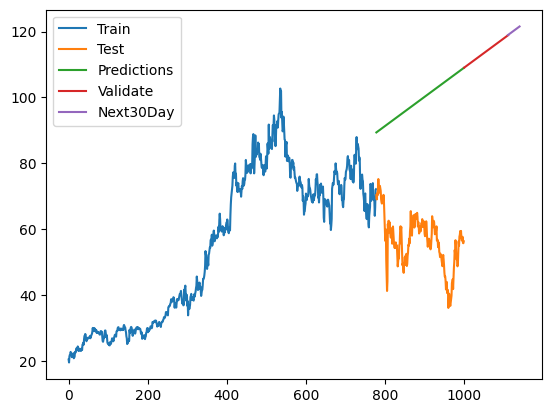

In [16]:
# 8. Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [17]:
test_data.index

RangeIndex(start=778, stop=1000, step=1)